# 4.5.1.3 学習の可視化 - PyTorch (MNIST)

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optimizers
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import datasets
import torchvision.transforms as transforms

In [0]:
class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, hidden_dim)
        self.a1 = nn.ReLU()
        self.d1 = nn.Dropout(0.5)
        self.l2 = nn.Linear(hidden_dim, hidden_dim)
        self.a2 = nn.ReLU()
        self.d2 = nn.Dropout(0.5)
        self.l3 = nn.Linear(hidden_dim, hidden_dim)
        self.a3 = nn.ReLU()
        self.d3 = nn.Dropout(0.5)
        self.l4 = nn.Linear(hidden_dim, output_dim)

        self.layers = [self.l1, self.a1, self.d1,
                       self.l2, self.a2, self.d2,
                       self.l3, self.a3, self.d3,
                       self.l4]

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)

        return x

In [0]:
np.random.seed(123)
torch.manual_seed(123)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# 1. データの準備
root = os.path.join('~', '.torch', 'mnist')
transform = transforms.Compose([transforms.ToTensor(),
                                lambda x: x.view(-1)])
mnist_train = datasets.MNIST(root=root,
                              download=True,
                              train=True,
                              transform=transform)
mnist_test = datasets.MNIST(root=root,
                            download=True,
                            train=False,
                            transform=transform)

n_samples = len(mnist_train)
n_train = int(n_samples * 0.8)
n_val = n_samples - n_train

mnist_train, mnist_val = \
    random_split(mnist_train, [n_train, n_val])

train_dataloader = DataLoader(mnist_train,
                              batch_size=100,
                              shuffle=True)
val_dataloader = DataLoader(mnist_val,
                            batch_size=100,
                            shuffle=False)
test_dataloader = DataLoader(mnist_test,
                              batch_size=100,
                              shuffle=False)



Extracting /root/.torch/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /root/.torch/mnist/MNIST/raw



Extracting /root/.torch/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.torch/mnist/MNIST/raw



Extracting /root/.torch/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.torch/mnist/MNIST/raw



Extracting /root/.torch/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.torch/mnist/MNIST/raw
Processing...
Done!


In [0]:
# 2. モデルの構築
model = DNN(784, 200, 10).to(device)

In [6]:
# 3. モデルの学習
criterion = nn.CrossEntropyLoss()
optimizer = optimizers.SGD(model.parameters(), lr=0.01)

def compute_loss(t, y):
    return criterion(y, t)

def train_step(x, t):
    model.train()
    preds = model(x)
    loss = compute_loss(t, preds)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss, preds

def val_step(x, t):
    model.eval()
    preds = model(x)
    loss = criterion(preds, t)

    return loss, preds

epochs = 100
hist = {'val_loss': [], 'val_accuracy': []}

for epoch in range(epochs):
    train_loss = 0.
    train_acc = 0.
    val_loss = 0.
    val_acc = 0.

    for (x, t) in train_dataloader:
        x, t = x.to(device), t.to(device)
        loss, preds = train_step(x, t)
        train_loss += loss.item()
        train_acc += \
            accuracy_score(t.tolist(),
                            preds.argmax(dim=-1).tolist())

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    for (x, t) in val_dataloader:
        x, t = x.to(device), t.to(device)
        loss, preds = val_step(x, t)
        val_loss += loss.item()
        val_acc += \
            accuracy_score(t.tolist(),
                            preds.argmax(dim=-1).tolist())

    val_loss /= len(val_dataloader)
    val_acc /= len(val_dataloader)

    hist['val_loss'].append(val_loss)
    hist['val_accuracy'].append(val_acc)

    print('epoch: {}, loss: {:.3}, acc: {:.3f}'
          ', val_loss: {:.3}, val_acc: {:.3f}'.format(
              epoch+1,
              train_loss,
              train_acc,
              val_loss,
              val_acc
          ))


epoch: 1, loss: 2.29, acc: 0.139, val_loss: 2.28, val_acc: 0.212
epoch: 2, loss: 2.25, acc: 0.266, val_loss: 2.16, val_acc: 0.473
epoch: 3, loss: 1.94, acc: 0.408, val_loss: 1.38, val_acc: 0.632
epoch: 4, loss: 1.31, acc: 0.553, val_loss: 0.871, val_acc: 0.727
epoch: 5, loss: 1.01, acc: 0.658, val_loss: 0.666, val_acc: 0.809
epoch: 6, loss: 0.826, acc: 0.731, val_loss: 0.538, val_acc: 0.846
epoch: 7, loss: 0.706, acc: 0.777, val_loss: 0.463, val_acc: 0.870
epoch: 8, loss: 0.629, acc: 0.808, val_loss: 0.408, val_acc: 0.886
epoch: 9, loss: 0.569, acc: 0.830, val_loss: 0.373, val_acc: 0.892
epoch: 10, loss: 0.522, acc: 0.846, val_loss: 0.342, val_acc: 0.901
epoch: 11, loss: 0.485, acc: 0.858, val_loss: 0.32, val_acc: 0.907
epoch: 12, loss: 0.455, acc: 0.868, val_loss: 0.3, val_acc: 0.915
epoch: 13, loss: 0.427, acc: 0.877, val_loss: 0.282, val_acc: 0.920
epoch: 14, loss: 0.406, acc: 0.883, val_loss: 0.268, val_acc: 0.921
epoch: 15, loss: 0.39, acc: 0.888, val_loss: 0.254, val_acc: 0.925
e

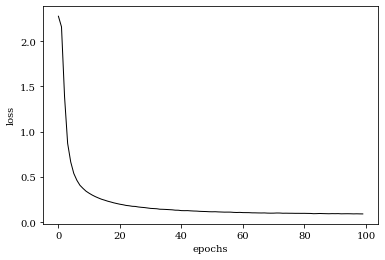

In [7]:
# 4. モデルの評価
# 検証データの誤差の可視化
val_loss = hist['val_loss']

fig = plt.figure()
plt.rc('font', family='serif')
plt.plot(range(len(val_loss)), val_loss,
          color='black', linewidth=1)
plt.xlabel('epochs')
plt.ylabel('loss')
# plt.savefig('output.jpg')
plt.show()

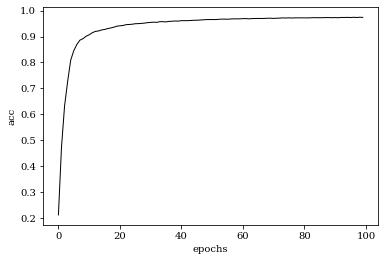

In [8]:
# 正解率を可視化する場合
val_acc = hist['val_accuracy']

fig = plt.figure()
plt.rc('font', family='serif')
plt.plot(range(len(val_acc)), val_acc,
         color='black', linewidth=1)
plt.xlabel('epochs')
plt.ylabel('acc')
# plt.savefig('output_acc.jpg')
plt.show()

In [9]:
# テストデータの評価
def test_step(x, t):
    return val_step(x, t)

test_loss = 0.
test_acc = 0.

for (x, t) in test_dataloader:
    x, t = x.to(device), t.to(device)
    loss, preds = test_step(x, t)
    test_loss += loss.item()
    test_acc += \
        accuracy_score(t.tolist(),
                        preds.argmax(dim=-1).tolist())

test_loss /= len(test_dataloader)
test_acc /= len(test_dataloader)
print('test_loss: {:.3f}, test_acc: {:.3f}'.format(
    test_loss,
    test_acc
))

test_loss: 0.085, test_acc: 0.976
